<a href="https://colab.research.google.com/github/femketenharkel/Predicting_Ratings/blob/main/models/clustering/DBSCAN_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install gower

In [3]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.cluster import DBSCAN
import gower
import matplotlib.pyplot as plt

In [26]:

from google.colab import drive
import pandas as pd
# Load in the data
drive.mount('/content/drive')
df_final = pd.read_csv("/content/drive/My Drive/Thesis/Data/df_final_2.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_final.head()

,UserID,MovieID,Rating,Age,Year,Month,Day,Hour,Release_year,Time_release_to_rating,...,Favourite_Fantasy,Favourite_Film-Noir,Favourite_Horror,Favourite_Musical,Favourite_Mystery,Favourite_Romance,Favourite_Sci-Fi,Favourite_Thriller,Favourite_War,Favourite_Western
0,5616,3590,3,4,2000,5,24,2,1974,26,...,False,False,False,False,False,False,False,False,False,True
1,4060,21,4,2,2000,8,5,15,1995,5,...,False,False,False,False,False,False,False,False,False,True
2,1125,3273,2,1,2000,11,22,16,2000,0,...,False,True,False,False,False,False,False,False,False,False
3,3410,585,4,3,2000,8,27,22,1995,5,...,False,True,False,False,False,False,False,False,False,False
4,3675,1374,4,3,2000,8,15,18,1982,18,...,False,True,False,False,False,False,False,False,False,False


In [27]:
# Exclude target variable and unique identifiers for clustering
df = df_final.drop(columns= ['Rating', 'MovieID', 'UserID'])

In [10]:
df_final.shape

(400083, 71)

In [28]:
# Normalize the numerical features
scaler = MinMaxScaler()
features_to_scale = ['Year', 'Month', 'Day', 'Hour', 'Age', 'Release_year',
                       'Time_release_to_rating', 'Total_ratings_per_movie',
                       'Total_ratings_per_user' ]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


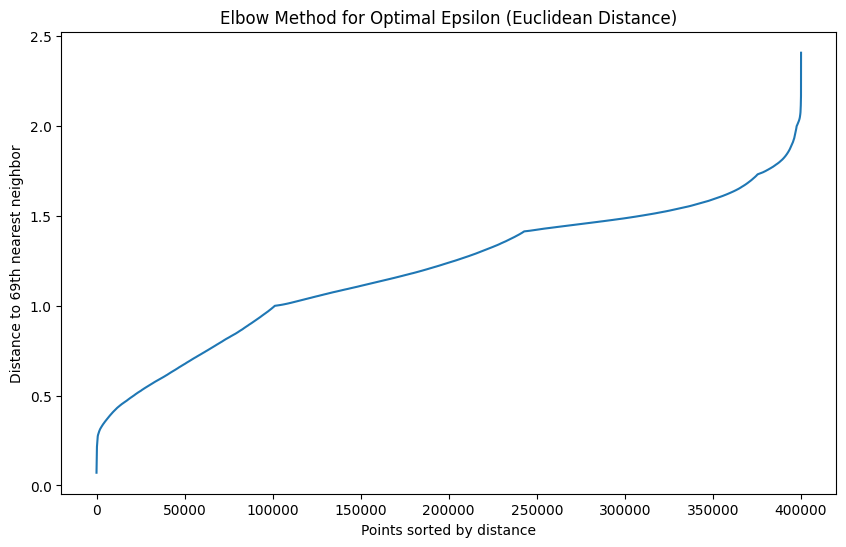

In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Function to plot the elbow method for DBSCAN using Euclidean distance
def plot_dbscan_elbow(X, min_samples):
    # Compute the nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)

    # Sort the distances (min_samples-th nearest neighbor distance)
    distances = np.sort(distances[:, min_samples-1], axis=0)

    # Plot the distances
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel('Distance to {}th nearest neighbor'.format(min_samples))
    plt.title('Elbow Method for Optimal Epsilon (Euclidean Distance)')
    plt.show()

# Example usage
plot_dbscan_elbow(X, min_samples=69)

In [17]:
# Applying DBSCAN with an estimated epsilon
epsilon = 1  # Replace with your chosen epsilon from the elbow plot
dbscan = DBSCAN(eps=epsilon, min_samples=69)
clusters = dbscan.fit_predict(X)

# Adding cluster labels to the dataframe
df_final['Cluster'] = clusters

df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_DBSCAN_clustering.csv', index=False)

In [20]:
unique_clusters = df_final['Cluster'].unique()

In [22]:
df['Cluster'] = clusters

In [23]:
df.head()

,Age,Year,Month,Day,Hour,Release_year,Time_release_to_rating,Total_ratings_per_movie,Total_ratings_per_user,Female,...,Favourite_Film-Noir,Favourite_Horror,Favourite_Musical,Favourite_Mystery,Favourite_Romance,Favourite_Sci-Fi,Favourite_Thriller,Favourite_War,Favourite_Western,Cluster
0,0.666667,0.0,0.363636,0.766667,0.086957,0.679012,0.317073,0.024511,0.047951,False,...,False,False,False,False,False,False,False,False,True,0
1,0.333333,0.0,0.636364,0.133333,0.652174,0.938272,0.060976,0.395390,0.102877,False,...,False,False,False,False,False,False,False,False,True,-1
2,0.166667,0.0,0.909091,0.700000,0.695652,1.000000,0.000000,0.168077,0.244115,True,...,True,False,False,False,False,False,False,False,False,-1
3,0.500000,0.0,0.636364,0.866667,0.956522,0.938272,0.060976,0.121681,0.309939,False,...,True,False,False,False,False,False,False,False,False,1
4,0.500000,0.0,0.636364,0.466667,0.782609,0.777778,0.219512,0.422235,0.361378,False,...,True,False,False,False,False,False,False,False,False,2


In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Extract the feature values
X = df.drop(columns=['Cluster']).values

# Extract the cluster labels
cluster_labels = df['Cluster'].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: -0.18


# Another try

In [29]:
# Extract the values from the dataframe
X = df.values

In [30]:
# Applying DBSCAN with an estimated epsilon
epsilon = 1.5
dbscan = DBSCAN(eps=epsilon, min_samples=69)
clusters = dbscan.fit_predict(X)
df['Cluster'] = clusters

# Adding cluster labels to the dataframe
df_final['Cluster'] = clusters

df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_DBSCAN_clustering.csv', index=False)

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Extract the feature values
X = df.drop(columns=['Cluster']).values

# Extract the cluster labels
cluster_labels = df['Cluster'].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.10


# Gower distance

In [ ]:
# WITH THE GOWER DISTANCE -> too expensive

# Calculate Gower distance matrix
gower_distances = gower.gower_matrix(df)

# Define a range of eps values to test, with smaller steps
eps_values = np.arange(0.1, 2.0, 0.1)

# Store the number of clusters for each eps value
num_clusters = []

# Min_samples based on heuristic that says 2*amount of features
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=140, metric='precomputed')
    clusters = dbscan.fit_predict(gower_distances)
    num_clusters.append(len(set(clusters)) - (1 if -1 in clusters else 0))  # Exclude noise points

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(eps_values, num_clusters, marker='o')
plt.title('Elbow Method for DBSCAN with Gower Distance')
plt.xlabel('Eps value')
plt.ylabel('Number of Clusters')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Assume optimal_eps is chosen based on the elbow method
optimal_eps = 0.5  # Replace with the optimal eps value from the graph

# Apply DBSCAN with the chosen eps value
dbscan = DBSCAN(eps=optimal_eps, min_samples=5, metric='precomputed')
clusters = dbscan.fit_predict(gower_distances)

# Add cluster labels back to the DataFrame
df_final['Cluster'] = clusters

# Display the DataFrame with clusters
print(df_final)

In [ ]:
# Optimized code with chunks
import gower
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Function to calculate Gower distance matrix for a chunk
def calculate_gower_distance_chunk(chunk):
    return gower.gower_matrix(chunk)

# Function to fit DBSCAN on a chunk
def fit_dbscan_chunk(eps, chunk_distances, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    clusters = dbscan.fit_predict(chunk_distances)
    return len(set(clusters)) - (1 if -1 in clusters else 0)

# Define subsample fraction and chunk size
sample_fraction = 0.1  # Adjust this as needed
chunk_size = 10000  # Adjust this as needed
min_samples = 140  # Heuristic based on 2 * number of features

# Sample the DataFrame
df_sample = df_final.sample(frac=sample_fraction, random_state=42)

# Process the DataFrame in chunks
num_chunks = int(np.ceil(len(df_sample) / chunk_size))

# Calculate Gower distance matrices for each chunk
gower_distances_chunks = Parallel(n_jobs=-1)(delayed(calculate_gower_distance_chunk)(df_sample.iloc[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks))

# Define a range of eps values to test
eps_values = np.arange(0.1, 2.0, 0.1)

# Store the number of clusters for each eps value
num_clusters = []

# Fit DBSCAN on each chunk for each eps value
for eps in eps_values:
    clusters_per_chunk = Parallel(n_jobs=-1)(delayed(fit_dbscan_chunk)(eps, chunk_distances, min_samples) for chunk_distances in gower_distances_chunks)
    num_clusters.append(np.mean(clusters_per_chunk))

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(eps_values, num_clusters, marker='o')
plt.title('Elbow Method for DBSCAN with Gower Distance')
plt.xlabel('Eps value')
plt.ylabel('Number of Clusters')
plt.show()


## old CODE

In [ ]:
# klopt niet, aantal clusters is ongeveer aantal instances -> nog aanpassen

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
clusters = dbscan.fit_predict(df)

# Add cluster labels back to the DataFrame
df_final['Cluster'] = clusters


In [ ]:
# Still needed for the datapreprocessing -> not for the clustering

# Remove total ratings per user because that is over the 100% dataset
df_final = df_final.drop(columns=['Total_ratings_per_user'])

# Create the new column with the time difference
df_final['Time_release_to_rating'] = df_final['Year'] - df_final['Release_year']

# Create count variables over the 40% dataset
# Creating total ratings per movie
df_final['Total_ratings_per_movie'] = df_final.groupby('MovieID')['MovieID'].transform('count')

# Create total ratings per user
df_final['Total_ratings_per_user'] = df_final.groupby('UserID')['UserID'].transform('count')
